In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',index_col='Date',parse_dates=True)

In [4]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [18]:
#缩短数据集的列名
data.columns = ['West','East','Total']#新增一列total
data['Total'] = data.eval('West+East')#total为w+e
data.dropna().describe()

,West,East,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


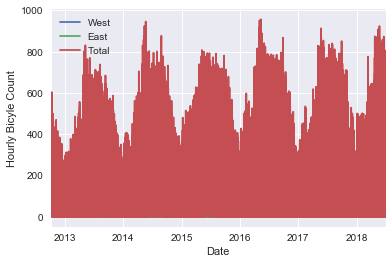

In [22]:
#1.数据可视化
%matplotlib inline
import seaborn;seaborn.set()

data.plot()
plt.ylabel('Hourly Bicyle Count')

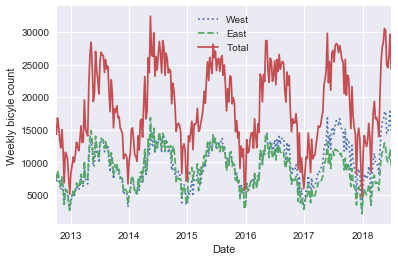

In [26]:
#通过重新取样获取更大颗粒度
#这样可以显示出季度特征
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicyle count')

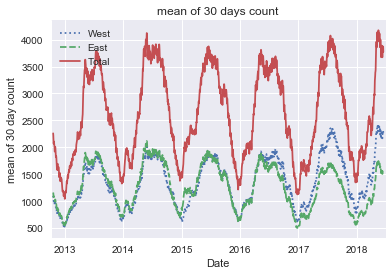

In [31]:
#简单方法，利用rolling求移动平均值
daily = data.resample('D').sum()
daily.rolling(30,center=True).mean().plot(style=[':','--','-'])
plt.ylabel('mean of 30 day count')
plt.title('mean of 30 days count')

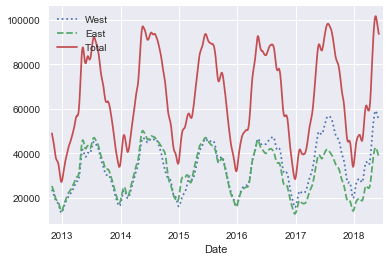

In [32]:
#高斯平滑，设置窗口宽度50，设置窗内高斯平滑10天
daily.rolling(50,center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

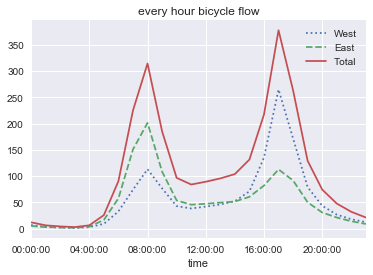

In [34]:
#2.深入挖掘数据
by_time = data.groupby(data.index.time).mean()#根据时间聚合后，再平均
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks,style=[':','--','-'])
plt.title('every hour bicycle flow')